In [1]:
import pandas as pd
rating = pd.read_csv('ratings.csv')
movies = pd.read_csv('movies.csv')

In [2]:
secondsperyear = 31557600
rating['year'] = rating['timestamp']//secondsperyear + 1970

In [3]:
genrelist = set()
for index, row in movies.iterrows():
    currgenres = row['genres'].split("|")
    genrelist.update(currgenres)
genrelist = sorted(genrelist)
print(genrelist)

['(no genres listed)', 'Action', 'Adventure', 'Animation', 'Children', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'IMAX', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western']


In [12]:
columns = [i for i in range(1995,2019)]
genrefreqovertime = pd.DataFrame(0,index=genrelist, columns=columns).astype(float)
genrefreqovertime.head()

,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
(no genres listed),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Action,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Adventure,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Animation,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Children,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [13]:
for index, row in rating.iterrows():
    if index > 100000: break
    year = row['year']
    movie = row['movieId']
    y = movies.loc[movie == movies['movieId']]
    relevantgenres = movies['genres'][int(y.index.tolist()[0])]
    relevantgenrelist = relevantgenres.split('|')
    for genre in relevantgenrelist:
        genrefreqovertime[year][genre] += 1

In [14]:
genrefreqovertime

,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
(no genres listed),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,3.0,3.0,25.0,23.0
Action,0.0,2111.0,974.0,343.0,1354.0,1253.0,1425.0,739.0,907.0,998.0,...,1226.0,677.0,957.0,1169.0,810.0,402.0,2608.0,2075.0,2251.0,1653.0
Adventure,0.0,1454.0,745.0,221.0,999.0,1046.0,1117.0,629.0,800.0,764.0,...,992.0,568.0,686.0,842.0,623.0,307.0,1888.0,1617.0,1700.0,1293.0
Animation,0.0,324.0,125.0,40.0,204.0,277.0,250.0,137.0,235.0,181.0,...,329.0,204.0,222.0,271.0,198.0,135.0,507.0,433.0,579.0,592.0
Children,0.0,567.0,244.0,86.0,372.0,472.0,429.0,249.0,358.0,254.0,...,343.0,302.0,253.0,309.0,243.0,125.0,488.0,404.0,561.0,467.0
Comedy,0.0,2352.0,1076.0,340.0,2155.0,2625.0,2409.0,1554.0,1506.0,1298.0,...,1382.0,1215.0,1003.0,1126.0,830.0,472.0,2180.0,1683.0,1955.0,1345.0
Crime,0.0,1303.0,501.0,162.0,984.0,863.0,929.0,460.0,527.0,633.0,...,708.0,486.0,468.0,532.0,375.0,295.0,1467.0,971.0,1090.0,821.0
Documentary,0.0,35.0,12.0,6.0,52.0,89.0,46.0,42.0,46.0,73.0,...,88.0,52.0,35.0,19.0,24.0,23.0,122.0,60.0,53.0,62.0
Drama,0.0,2739.0,1271.0,440.0,2906.0,2785.0,3135.0,1544.0,1522.0,1626.0,...,1918.0,1462.0,1106.0,1293.0,1003.0,751.0,3783.0,2203.0,2743.0,1704.0
Fantasy,0.0,500.0,278.0,88.0,497.0,520.0,522.0,317.0,393.0,369.0,...,524.0,346.0,347.0,395.0,351.0,157.0,905.0,701.0,959.0,615.0


<AxesSubplot:>

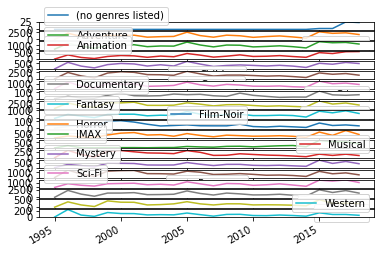

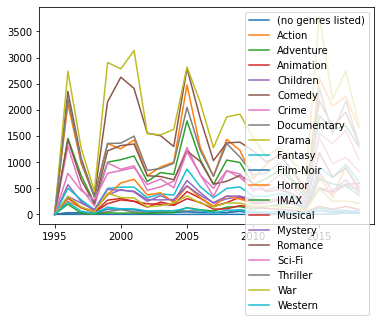

In [27]:
#import matplotlib.pyplot as plt
#genrefreqovertime.plot()
transposed_df = genrefreqovertime.T
transposed_df.plot(subplots=True)
transposed_df.plot()

<AxesSubplot:>

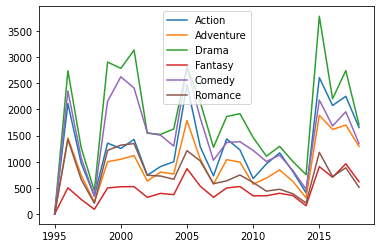

In [53]:
genrefreqsubset = transposed_df[['Action','Adventure','Drama','Fantasy','Comedy','Romance']].copy()
genrefreqsubset.plot()

In [28]:
genreovertimecnt = pd.DataFrame(0.0,index=genrelist, columns=columns).astype(float)
genreovertimecnt.head()

genreovertimesum = pd.DataFrame(0.0,index=genrelist, columns=columns).astype(float)
genreovertimesum.head()

,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
(no genres listed),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Action,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Adventure,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Animation,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Children,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [29]:
for index, row in rating.iterrows():
    if index > 100000: break
    year = row['year']
    movie = row['movieId']
    r = row['rating']
    y = movies.loc[movie == movies['movieId']]
    relevantgenres = movies['genres'][int(y.index.tolist()[0])]
    relevantgenrelist = relevantgenres.split('|')
    for genre in relevantgenrelist:
        genreovertimecnt[year][genre] += float(r)
        genreovertimesum[year][genre] += 5.0

In [30]:
genreovertimecnt

,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
(no genres listed),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,7.5,14.5,73.5,65.0
Action,0.0,7201.0,3439.0,1127.0,4554.0,4459.0,4822.0,2623.0,2965.5,3347.5,...,4384.0,2143.5,3277.5,4328.5,2761.0,1550.0,8668.0,7417.5,7785.5,5267.0
Adventure,0.0,5052.0,2683.0,767.0,3446.0,3793.0,3923.0,2270.0,2682.5,2633.5,...,3556.0,1833.0,2402.5,3168.5,2113.5,1159.5,6476.5,5765.5,5812.5,4072.0
Animation,0.0,1186.0,445.0,147.0,729.0,1058.0,939.0,502.0,781.0,632.0,...,1218.0,678.5,818.0,1085.5,675.5,494.0,1781.0,1612.0,2087.0,1770.0
Children,0.0,2033.0,825.0,279.0,1289.0,1714.0,1471.0,865.0,1171.0,832.5,...,1173.0,950.5,902.0,1182.5,756.0,436.0,1624.5,1420.5,1901.0,1394.5
Comedy,0.0,8137.0,3671.0,1111.0,7566.0,9295.0,8527.0,5461.0,4878.5,4590.5,...,4950.5,3947.5,3391.0,4156.5,2465.5,1709.0,7107.0,5899.5,6619.5,4127.5
Crime,0.0,4675.0,1840.0,534.0,3664.0,3285.0,3386.0,1727.0,1844.0,2377.5,...,2769.0,1750.5,1672.5,1996.0,1252.0,1161.0,5238.5,3765.5,3921.0,2925.0
Documentary,0.0,137.0,49.0,22.0,215.0,373.0,163.0,180.0,192.5,286.5,...,363.0,190.0,130.0,73.0,63.0,93.0,452.0,241.0,180.0,195.0
Drama,0.0,10296.0,4710.0,1581.0,10942.0,10637.0,11454.0,5761.0,5299.0,6332.0,...,7403.5,5221.5,3949.0,4794.0,3125.0,2935.5,13685.0,8517.0,9733.0,5996.0
Fantasy,0.0,1764.0,933.0,287.0,1720.0,1870.0,1820.0,1118.0,1285.0,1280.5,...,1851.5,1150.5,1223.5,1468.0,1156.5,565.5,3131.0,2473.0,3368.5,1887.5


In [31]:
genreovertimesum

,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
(no genres listed),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,15.0,15.0,125.0,115.0
Action,0.0,10555.0,4870.0,1715.0,6770.0,6265.0,7125.0,3695.0,4535.0,4990.0,...,6130.0,3385.0,4785.0,5845.0,4050.0,2010.0,13040.0,10375.0,11255.0,8265.0
Adventure,0.0,7270.0,3725.0,1105.0,4995.0,5230.0,5585.0,3145.0,4000.0,3820.0,...,4960.0,2840.0,3430.0,4210.0,3115.0,1535.0,9440.0,8085.0,8500.0,6465.0
Animation,0.0,1620.0,625.0,200.0,1020.0,1385.0,1250.0,685.0,1175.0,905.0,...,1645.0,1020.0,1110.0,1355.0,990.0,675.0,2535.0,2165.0,2895.0,2960.0
Children,0.0,2835.0,1220.0,430.0,1860.0,2360.0,2145.0,1245.0,1790.0,1270.0,...,1715.0,1510.0,1265.0,1545.0,1215.0,625.0,2440.0,2020.0,2805.0,2335.0
Comedy,0.0,11760.0,5380.0,1700.0,10775.0,13125.0,12045.0,7770.0,7530.0,6490.0,...,6910.0,6075.0,5015.0,5630.0,4150.0,2360.0,10900.0,8415.0,9775.0,6725.0
Crime,0.0,6515.0,2505.0,810.0,4920.0,4315.0,4645.0,2300.0,2635.0,3165.0,...,3540.0,2430.0,2340.0,2660.0,1875.0,1475.0,7335.0,4855.0,5450.0,4105.0
Documentary,0.0,175.0,60.0,30.0,260.0,445.0,230.0,210.0,230.0,365.0,...,440.0,260.0,175.0,95.0,120.0,115.0,610.0,300.0,265.0,310.0
Drama,0.0,13695.0,6355.0,2200.0,14530.0,13925.0,15675.0,7720.0,7610.0,8130.0,...,9590.0,7310.0,5530.0,6465.0,5015.0,3755.0,18915.0,11015.0,13715.0,8520.0
Fantasy,0.0,2500.0,1390.0,440.0,2485.0,2600.0,2610.0,1585.0,1965.0,1845.0,...,2620.0,1730.0,1735.0,1975.0,1755.0,785.0,4525.0,3505.0,4795.0,3075.0


In [34]:
genrefracovertime = (genreovertimecnt/genreovertimesum) * 5.0

In [35]:
genrefracovertime

,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
(no genres listed),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2.500000,4.833333,2.940000,2.826087
Action,NaN,3.411180,3.530801,3.285714,3.363368,3.558659,3.383860,3.549391,3.269570,3.354208,...,3.575856,3.166174,3.424765,3.702737,3.408642,3.855721,3.323620,3.574699,3.458685,3.186328
Adventure,NaN,3.474553,3.601342,3.470588,3.449449,3.626195,3.512086,3.608903,3.353125,3.446990,...,3.584677,3.227113,3.502187,3.763064,3.392456,3.776873,3.430350,3.565553,3.419118,3.149265
Animation,NaN,3.660494,3.560000,3.675000,3.573529,3.819495,3.756000,3.664234,3.323404,3.491713,...,3.702128,3.325980,3.684685,4.005535,3.411616,3.659259,3.512821,3.722864,3.604491,2.989865
Children,NaN,3.585538,3.381148,3.244186,3.465054,3.631356,3.428904,3.473896,3.270950,3.277559,...,3.419825,3.147351,3.565217,3.826861,3.111111,3.488000,3.328893,3.516089,3.388592,2.986081
Comedy,NaN,3.459609,3.411710,3.267647,3.510905,3.540952,3.539643,3.514157,3.239376,3.536595,...,3.582127,3.248971,3.380857,3.691385,2.970482,3.620763,3.260092,3.505348,3.385934,3.068773
Crime,NaN,3.587874,3.672655,3.296296,3.723577,3.806489,3.644779,3.754348,3.499051,3.755924,...,3.911017,3.601852,3.573718,3.751880,3.338667,3.935593,3.570893,3.877961,3.597248,3.562728
Documentary,NaN,3.914286,4.083333,3.666667,4.134615,4.191011,3.543478,4.285714,4.184783,3.924658,...,4.125000,3.653846,3.714286,3.842105,2.625000,4.043478,3.704918,4.016667,3.396226,3.145161
Drama,NaN,3.759036,3.705744,3.593182,3.765313,3.819390,3.653589,3.731218,3.481603,3.894219,...,3.860010,3.571477,3.570524,3.707657,3.115653,3.908788,3.617499,3.866092,3.548305,3.518779
Fantasy,NaN,3.528000,3.356115,3.261364,3.460765,3.596154,3.486590,3.526814,3.269720,3.470190,...,3.533397,3.325145,3.525937,3.716456,3.294872,3.601911,3.459669,3.527817,3.512513,3.069106


/Users/Jenny/miniconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


<AxesSubplot:>

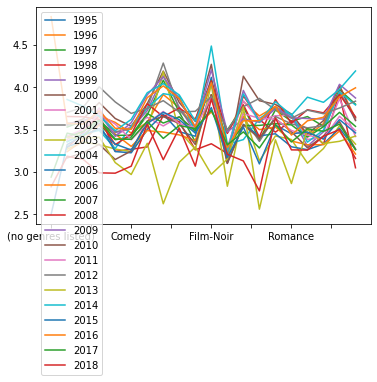

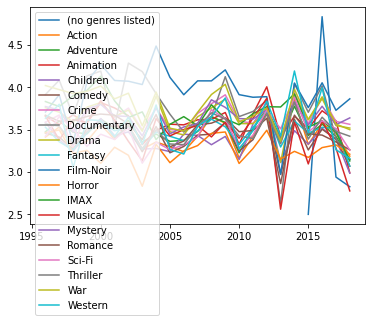

In [46]:
genrefracovertimetranspose = genrefracovertime.T
genrefracovertime.plot()
genrefracovertimetranspose.plot()

In [48]:
genreratingsubset = genrefracovertimetranspose[['Action', 'Adventure', 'Drama', 'Horror','Mystery','Thriller','War']].copy()

<AxesSubplot:>

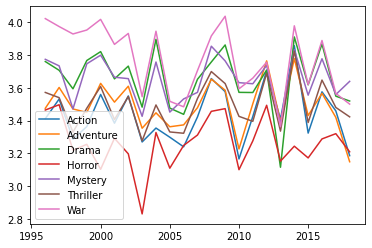

In [50]:
genreratingsubset.plot()